In [1]:
# 加载reuters数据集：
from fakeras.datasets import reuters

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [3]:
# 数据预处理：
import numpy as np

def one_hot_encode(docs, dim, dtype):
    docs_encoded = np.zeros((len(docs), dim), dtype=dtype)
    for i, doc in enumerate(docs):
        docs_encoded[i, doc] = 1
    return docs_encoded

dtype = 'float64'
x_train = one_hot_encode(x_train, dim=10000, dtype=dtype)
x_test = one_hot_encode(x_test, dim=10000, dtype=dtype)

y_train = one_hot_encode(y_train, dim=46, dtype=dtype)
y_test = one_hot_encode(y_test, dim=46, dtype=dtype)

In [4]:
# 构建网络：
from fakeras import NeuralNetwork
from fakeras.layer import Dense

model = NeuralNetwork()
model.add(Dense(64, 'relu', 'xavier', (10000,)))
model.add(Dense(64, 'relu', 'xavier'))
model.add(Dense(46, 'softmax', 'xavier'))

In [5]:
# 编译模型：
model.compile('rmsprop', 'cce', 'acc')

In [6]:
# 留出验证集：
x_val = x_train[:1000]
x_train_part = x_train[1000:]

y_val = y_train[:1000]
y_train_part = y_train[1000:]

In [7]:
# 训练模型：
histories = model.fit(inputs=x_train_part,
                      targets=y_train_part,
                      batch_size=512,
                      epochs=20,
                      lr=0.001,
                      validation_data=(x_val, y_val),
                      verbose=True,
                      use_every_sample=True)

Epoch 1/20 - loss: 1.747682 - acc: 0.661488 - loss_val: 1.853543 - acc_val: 0.652000 - time used: 3.4270036220550537s.


Epoch 2/20 - loss: 1.212278 - acc: 0.742922 - loss_val: 1.355781 - acc_val: 0.712000 - time used: 3.3379967212677s.


Epoch 3/20 - loss: 0.947560 - acc: 0.805813 - loss_val: 1.174643 - acc_val: 0.731000 - time used: 3.3770058155059814s.


Epoch 4/20 - loss: 0.757748 - acc: 0.832749 - loss_val: 1.060942 - acc_val: 0.770000 - time used: 3.0410008430480957s.


Epoch 5/20 - loss: 0.616320 - acc: 0.877975 - loss_val: 0.970676 - acc_val: 0.784000 - time used: 3.079000473022461s.


Epoch 6/20 - loss: 0.492489 - acc: 0.897895 - loss_val: 0.916601 - acc_val: 0.803000 - time used: 3.0769946575164795s.


Epoch 7/20 - loss: 0.421715 - acc: 0.913305 - loss_val: 0.907236 - acc_val: 0.789000 - time used: 3.0480031967163086s.


Epoch 8/20 - loss: 0.339267 - acc: 0.928965 - loss_val: 0.855289 - acc_val: 0.817000 - time used: 3.023000955581665s.


Epoch 9/20 - loss: 0.299792 - acc: 0.934603 - loss_val: 0.850511 - acc_val: 0.823000 - time used: 3.1270034313201904s.


Epoch 10/20 - loss: 0.238501 - acc: 0.943874 - loss_val: 0.831005 - acc_val: 0.829000 - time used: 3.0159997940063477s.


Epoch 11/20 - loss: 0.207067 - acc: 0.947256 - loss_val: 0.811801 - acc_val: 0.836000 - time used: 3.039001226425171s.


Epoch 12/20 - loss: 0.186772 - acc: 0.949762 - loss_val: 0.807112 - acc_val: 0.840000 - time used: 3.091996669769287s.


Epoch 13/20 - loss: 0.170003 - acc: 0.951766 - loss_val: 0.835263 - acc_val: 0.837000 - time used: 3.0400032997131348s.


Epoch 14/20 - loss: 0.155304 - acc: 0.952393 - loss_val: 0.830092 - acc_val: 0.836000 - time used: 3.0329997539520264s.


Epoch 15/20 - loss: 0.145832 - acc: 0.953646 - loss_val: 0.847697 - acc_val: 0.834000 - time used: 3.093000650405884s.


Epoch 16/20 - loss: 0.134795 - acc: 0.953771 - loss_val: 0.852328 - acc_val: 0.834000 - time used: 3.0540003776550293s.


Epoch 17/20 - loss: 0.128085 - acc: 0.955149 - loss_val: 0.841515 - acc_val: 0.851000 - time used: 3.0480048656463623s.


Epoch 18/20 - loss: 0.126557 - acc: 0.955400 - loss_val: 0.861640 - acc_val: 0.842000 - time used: 3.0339977741241455s.


Epoch 19/20 - loss: 0.121024 - acc: 0.955525 - loss_val: 0.855875 - acc_val: 0.842000 - time used: 3.113003730773926s.


Epoch 20/20 - loss: 0.121779 - acc: 0.955901 - loss_val: 0.880660 - acc_val: 0.831000 - time used: 3.0409979820251465s.


In [8]:
# 收集训练指标：
epochs = [histories[i]['epoch'] for i in range(len(histories))]
loss = [histories[i]['loss'] for i in range(len(histories))]
loss_val = [histories[i]['loss_val'] for i in range(len(histories))]
metric = [histories[i]['acc'] for i in range(len(histories))]
metric_val = [histories[i]['acc_val'] for i in range(len(histories))]


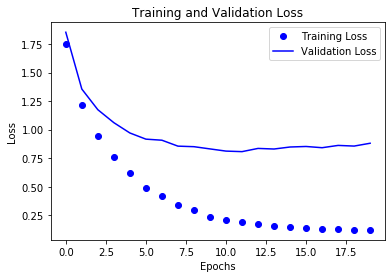

In [9]:
# 绘制训练损失和验证损失：
import matplotlib.pyplot as plt

plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, loss_val, 'b', label="Validation Loss")
plt.legend()

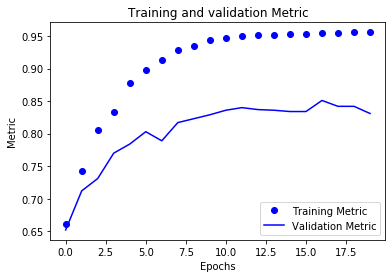

In [10]:
# 绘制训练精度和验证精度：
plt.title("Training and validation Metric")
plt.xlabel("Epochs")
plt.ylabel("Metric")
plt.plot(epochs, metric, 'bo', label="Training Metric")
plt.plot(epochs, metric_val, 'b', label="Validation Metric")
plt.legend()

In [11]:
# 微调超参数epochs：
model = NeuralNetwork()
model.add(Dense(64, 'relu', 'xavier', (10000,)))
model.add(Dense(64, 'relu', 'xavier'))
model.add(Dense(46, 'softmax', 'xavier'))
model.compile('rmsprop', 'cce', 'acc')
model.fit(x_train, 
          y_train,
          batch_size=512,
          epochs=10,
          verbose=True,
          use_every_sample=True)

Epoch 1/10 - loss: 1.016212 - acc: 0.754732 - time used: 4.062995433807373s.


Epoch 2/10 - loss: 0.801836 - acc: 0.775662 - time used: 4.117998361587524s.


Epoch 3/10 - loss: 0.447945 - acc: 0.889000 - time used: 4.11800217628479s.


Epoch 4/10 - loss: 0.286183 - acc: 0.920174 - time used: 3.8850011825561523s.


Epoch 5/10 - loss: 0.222388 - acc: 0.941216 - time used: 3.812999725341797s.


Epoch 6/10 - loss: 0.184871 - acc: 0.948675 - time used: 3.77900767326355s.


Epoch 7/10 - loss: 0.196217 - acc: 0.948118 - time used: 3.9349989891052246s.


Epoch 8/10 - loss: 0.159730 - acc: 0.953685 - time used: 4.158006191253662s.


Epoch 9/10 - loss: 0.138771 - acc: 0.955689 - time used: 3.6790006160736084s.


Epoch 10/10 - loss: 0.152564 - acc: 0.952683 - time used: 3.8389954566955566s.


[{'epoch': 0,
  'loss': 1.0162118248268235,
  'acc': 0.7547316855934089,
  'time_used': 4.062995433807373},
 {'epoch': 1,
  'loss': 0.8018359087685738,
  'acc': 0.7756624359830772,
  'time_used': 4.117998361587524},
 {'epoch': 2,
  'loss': 0.447945281934534,
  'acc': 0.8890002226675574,
  'time_used': 4.11800217628479},
 {'epoch': 3,
  'loss': 0.2861826516040814,
  'acc': 0.9201736806947233,
  'time_used': 3.8850011825561523},
 {'epoch': 4,
  'loss': 0.22238839287823037,
  'acc': 0.9412157648630604,
  'time_used': 3.812999725341797},
 {'epoch': 5,
  'loss': 0.18487133099266306,
  'acc': 0.9486751280338461,
  'time_used': 3.77900767326355},
 {'epoch': 6,
  'loss': 0.19621704686327499,
  'acc': 0.948118459140504,
  'time_used': 3.9349989891052246},
 {'epoch': 7,
  'loss': 0.15973010703676654,
  'acc': 0.9536851480739266,
  'time_used': 4.158006191253662},
 {'epoch': 8,
  'loss': 0.1387710655672878,
  'acc': 0.9556891560899585,
  'time_used': 3.6790006160736084},
 {'epoch': 9,
  'loss': 0

In [12]:
# 评估模型：
results = model.evaluate(x_test, y_test)
print(results)

{'loss': 1.353646317197376, 'metric': 0.7333036509349955}
